In [6]:
from icecream import ic

import numpy as np
from mmcv import Config, mkdir_or_exist

# Functions to calculate metrics and show the relevant chart colorbar.
from functions import compute_metrics, save_best_model, load_model, slide_inference, \
    batched_slide_inference, water_edge_metric, class_decider, create_train_validation_and_test_scene_list, \
    get_scheduler, get_optimizer, get_loss, get_model

# Load consutme loss function
from losses import WaterConsistencyLoss
# Custom dataloaders for regular training and validation.
from loaders import get_variable_options, AI4ArcticChallengeDataset, AI4ArcticChallengeTestDataset
#  get_variable_options

# -- Built-in modules -- #
from utils import colour_str
from test_upload_function import test

from quickstart import create_dataloaders

import matplotlib.pyplot as plt


In [7]:
args_config = 'configs/sic_mse/sic_mse_maud_03.py'

In [8]:
ic(args_config)
cfg = Config.fromfile(args_config)
train_options = cfg.train_options
# Get options for variables, amsrenv grid, cropping and upsampling.
train_options = get_variable_options(train_options)
device = 'cpu'
net = get_model(train_options, device)
create_train_validation_and_test_scene_list(train_options)
dataloader_train, dataloader_val = create_dataloaders(train_options)


ic| args_config: 'configs/sic_mse/sic_mse_maud_03.py'


Options initialised


100%|██████████| 26/26 [01:33<00:00,  3.59s/it]


In [9]:
len(dataloader_train), len(dataloader_train.dataset), len(dataloader_val), len(dataloader_val.dataset)

(500, 500, 6, 6)

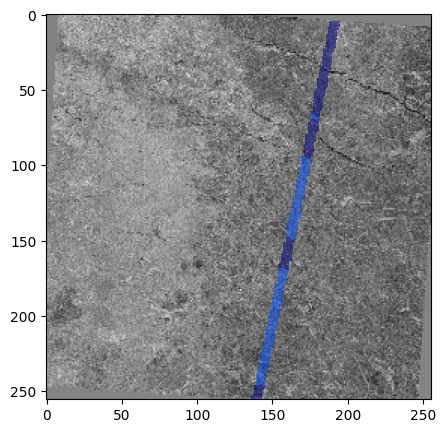

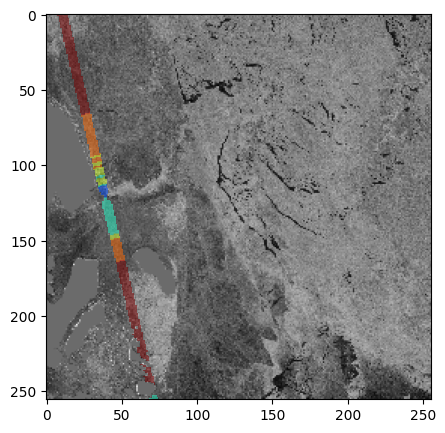

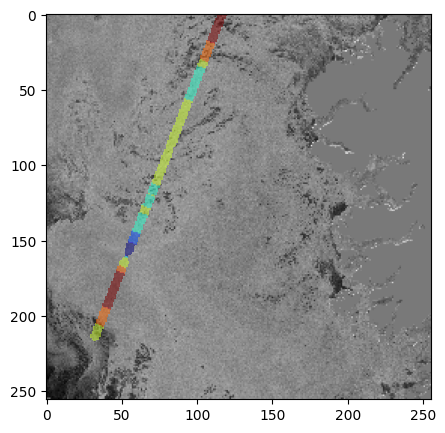

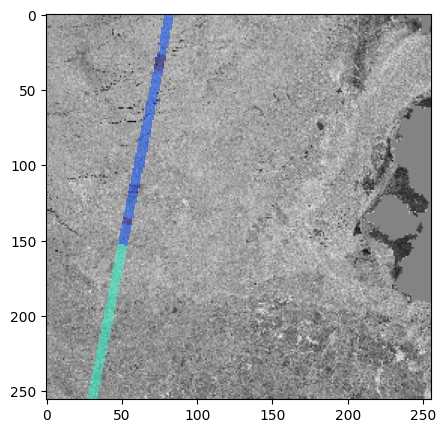

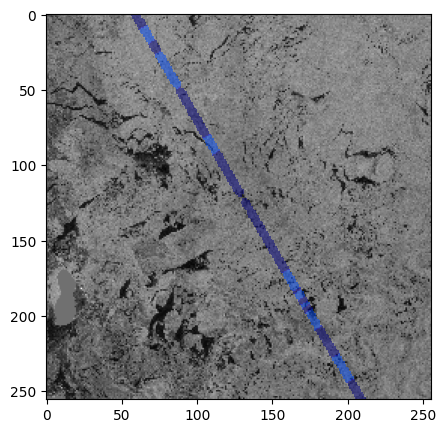

In [10]:
for i, ds0 in enumerate(dataloader_train.dataset):
    sic = ds0[1]['SIC'][0]
    sic = np.ma.MaskedArray(sic, mask=sic==255)
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    axs.imshow(ds0[0][0,0], cmap='gray')
    axs.imshow(sic, clim=(0,5), cmap='jet', alpha=0.5)
    plt.show()
    if i > 10:
        break


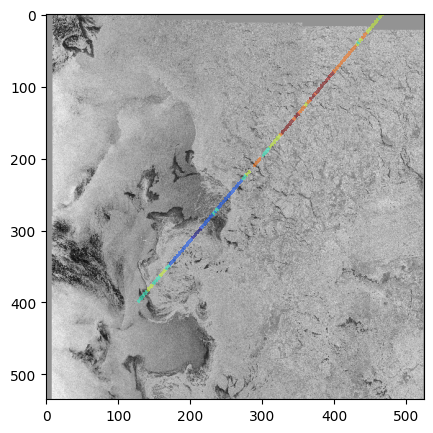

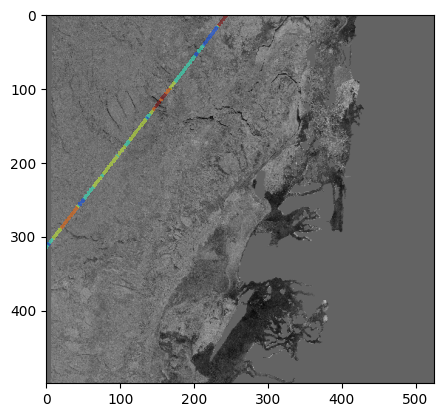

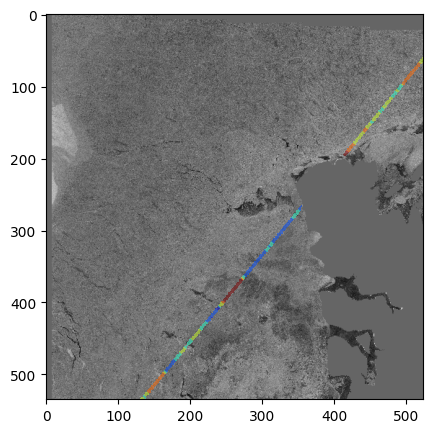

In [11]:
for i, ds0 in enumerate(dataloader_val.dataset):
    sic = np.ma.MaskedArray(ds0[1]['SIC'], mask=ds0[1]['SIC']==255)
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    axs.imshow(ds0[0][0,0], cmap='gray')
    axs.imshow(sic, clim=(0,5), cmap='jet', alpha=0.5)
    plt.show()

